<a href="https://colab.research.google.com/github/Dav00Arm/kaggle_house_price_prediction/blob/main/Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Import datasets**

In [79]:
X_train = pd.read_csv('train.csv')
X_test = pd.read_csv('test.csv')
y_train = list(X_train['SalePrice'])
X_train.drop('SalePrice', inplace=True, axis=1)

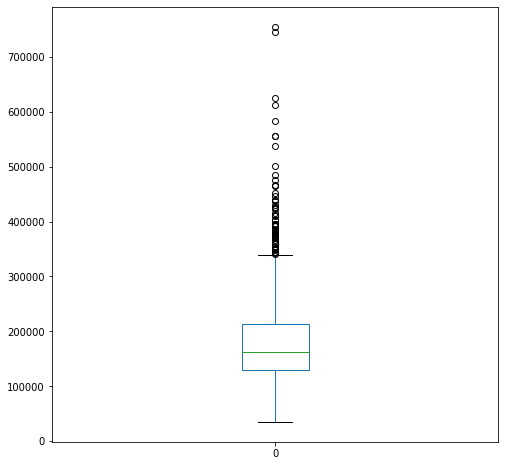

In [80]:
pd.DataFrame(y_train).plot(kind='box', figsize=(8,8))

**Dataset preprocessing**

In [81]:
# TRAINING DATASET
X_train = X_train.set_index('Id') 
nans_train = X_train.isna().sum() # Number of NaN in each column
nans_train = nans_train[nans_train!=0] # Drop 0s from nans 
col_names_train = nans_train.index # Columns that contain NaN

#TEST DATASET
X_test = X_test.set_index('Id')
nans_test = X_test.isna().sum() # Number of NaN in each column
nans_test = nans_test[nans_test!=0] # Drop 0s from nans
col_names_test = nans_test.index  # Columns that contain NaN

print(col_names_train)
print(col_names_test)

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')
Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='object')


In [82]:
# Get dtype of NaN column
# TRAINING DATASET
dtypes_train = []
for name in col_names_train:
  dtypes_train.append(X_train[name].dtype)

# TEST DATASET
dtypes_test = []
for name in col_names_test:
  dtypes_test.append(X_test[name].dtype)

print(dtypes_train)
print(dtypes_test)

[dtype('float64'), dtype('O'), dtype('O'), dtype('float64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('float64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O')]
[dtype('O'), dtype('float64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('float64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('float64'), dtype('O'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('float64'), dtype('O'), dtype('float64'), dtype('float64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O')]


In [83]:
# DataFrame with numbers of NaN values and their dtypes
# TRAINING DATASET
nan_df_train = pd.DataFrame({'col_name': col_names_train,
                      'dtypes': dtypes_train,
                      'count': pd.Series(nans_train.values)})

#TEST DATASET
nan_df_test = pd.DataFrame({'col_name': col_names_test,
                      'dtypes': dtypes_test,
                      'count': pd.Series(nans_test.values)})

nan_df_train.head(5)

,col_name,dtypes,count
0,LotFrontage,float64,259
1,Alley,object,1369
2,MasVnrType,object,8
3,MasVnrArea,float64,8
4,BsmtQual,object,37


In [84]:
nan_df_test.head(5)

,col_name,dtypes,count
0,MSZoning,object,4
1,LotFrontage,float64,227
2,Alley,object,1352
3,Utilities,object,2
4,Exterior1st,object,1


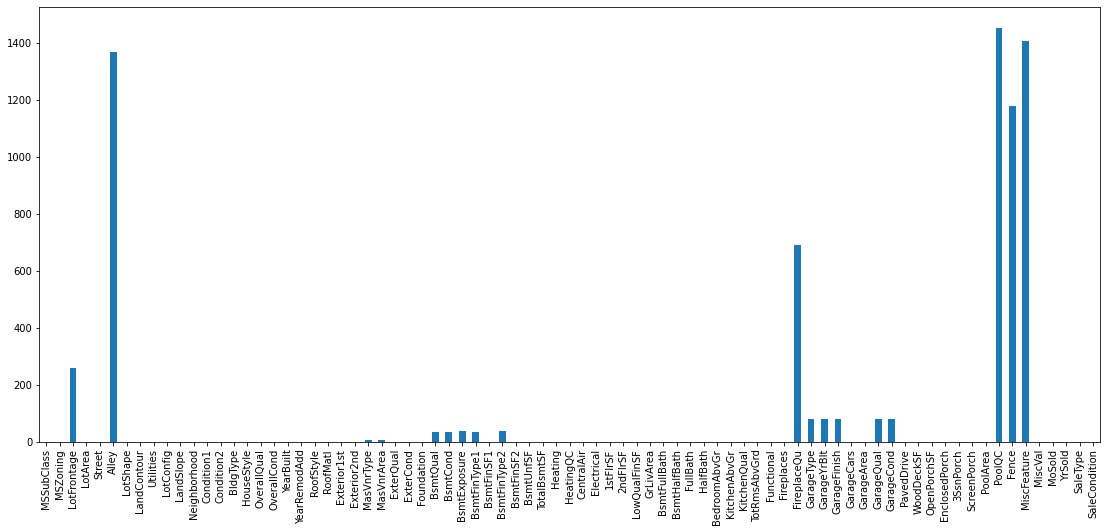

In [85]:
X_train.isna().sum().plot(kind='bar',figsize=(19,8))

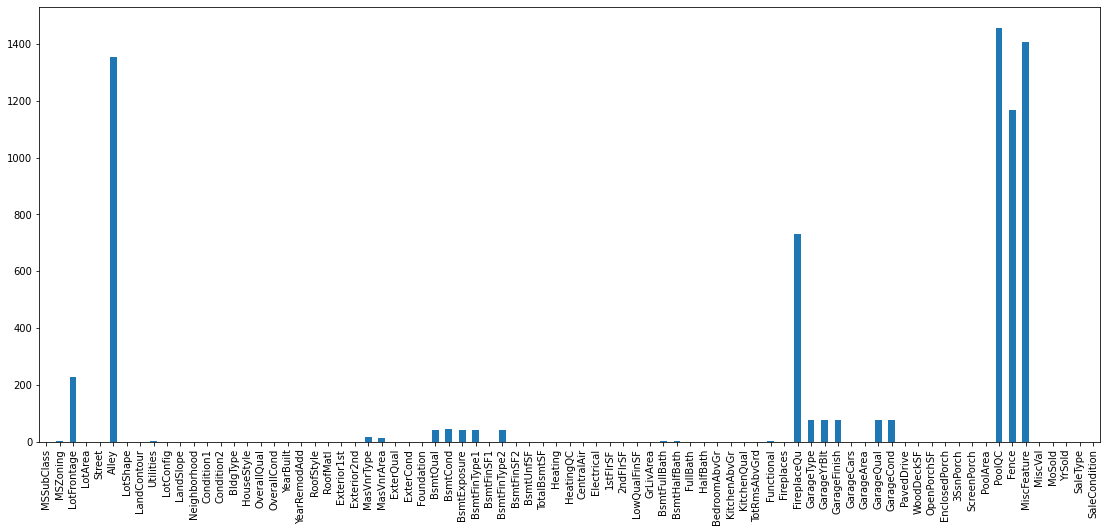

In [86]:
X_test.isna().sum().plot(kind='bar',figsize=(19,8))

In [87]:
# Filling missing values
# TRAINING DATASET
for col in X_train.columns:
    col_dtype = X_train[col].dtypes
    if (col_dtype == 'int64' or col_dtype == 'float64') and (X_train[col].isna().sum()>0):
        X_train[col] = X_train[col].fillna(X_train[col].mean()) 
    elif col_dtype == 'object' and (X_train[col].isna().sum()>0):
        X_train[col] = X_train[col].fillna(X_train[col].mode()[0])

# TEST DATASET
for col in X_test.columns:
    col_dtype = X_test[col].dtypes
    if (col_dtype == 'int64' or col_dtype == 'float64') and (X_test[col].isna().sum()>0):
        X_test[col] = X_test[col].fillna(X_test[col].mean()) 
    elif col_dtype == 'object' and (X_test[col].isna().sum()>0):
        X_test[col] = X_test[col].fillna(X_test[col].mode()[0])

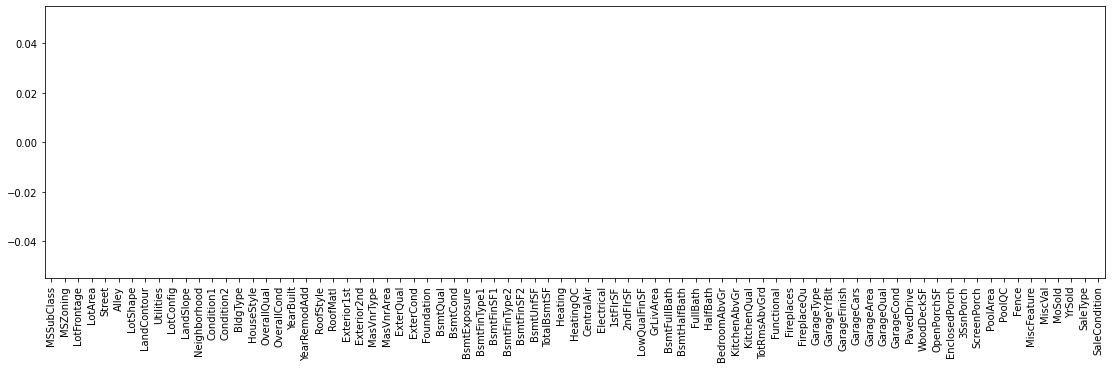

In [88]:
X_train.isna().sum().plot(kind='bar',figsize=(19,5))

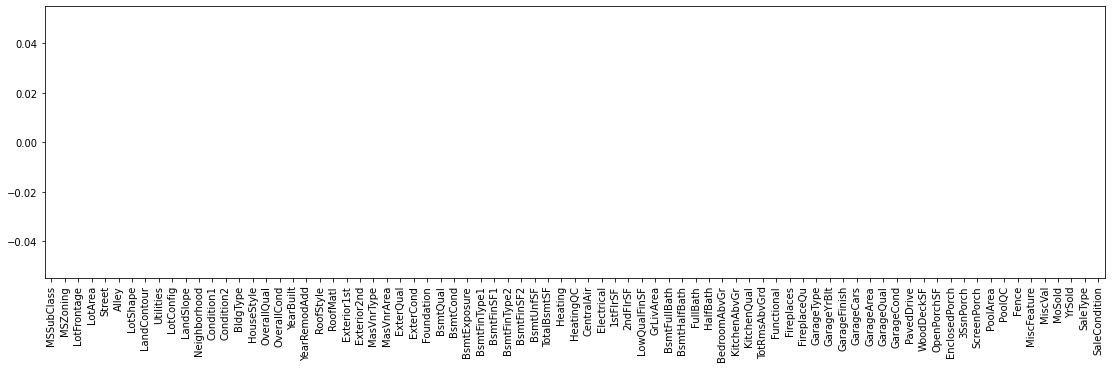

In [89]:
X_test.isna().sum().plot(kind='bar',figsize=(19,5))

In [90]:
# One-hot encoding columns
#TRAINING DATASET
encoding_columns_train = [col for col in X_train.columns if X_train[col].dtypes == 'object']

# TEST DATASET
encoding_columns_test = [col for col in X_train.columns if X_train[col].dtypes == 'object']

print(encoding_columns_train)
print(encoding_columns_test)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Fun

In [91]:
# One-hot encoding
X_train = pd.get_dummies(X_train, columns=encoding_columns_train)
X_test = pd.get_dummies(X_test, columns=encoding_columns_test)

In [92]:
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [93]:
# Difference between columns after encoding
missing_columns = list(set(X_train.columns) - set(X_test.columns))
missing_columns

['RoofMatl_Membran',
 'RoofMatl_Roll',
 'Condition2_RRAn',
 'Heating_OthW',
 'PoolQC_Fa',
 'MiscFeature_TenC',
 'RoofMatl_ClyTile',
 'Exterior1st_ImStucc',
 'Utilities_NoSeWa',
 'HouseStyle_2.5Fin',
 'Condition2_RRAe',
 'Electrical_Mix',
 'Exterior1st_Stone',
 'RoofMatl_Metal',
 'Exterior2nd_Other',
 'GarageQual_Ex',
 'Condition2_RRNn',
 'Heating_Floor']

In [94]:
# Filling missing columns
for column in missing_columns:
  X_test[column] = 0

In [95]:
# Sorting indexes
X_train = X_train.reindex(sorted(X_train.columns), axis=1)
X_test = X_test.reindex(sorted(X_test.columns), axis=1)


**Create Model**

In [96]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split as tts

In [97]:
train_X, test_X, train_y, test_y = tts(X_train, y_train, test_size=0.2)

In [98]:
model = XGBRegressor(objective='reg:squarederror',
         n_estimators=900,
         max_depth= 6, 
         colsample_bylevel=0.5,
         learning_rate=0.19,
         random_state=20)
model.fit(X_train, y_train)
# RMSLE SCORE 0.13488

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.19, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=20, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [99]:
y_pred = model.predict(X_test)
y_pred

array([128170.7 , 157475.8 , 187776.14, ..., 163019.  , 113385.69,
       207321.45], dtype=float32)